# Car Detection Workshop with YOLOv8

In this workshop, we will learn how to:
1. Download a sample video
2. Install YOLOv8
3. Load a pre-trained YOLOv8 model
4. Detect cars in a single frame
5. Process the entire video
6. Display the results with car labels and counts

Let's get started!

## 1. Download a Sample Video

First, let's download a sample traffic video and trim it to 10 seconds to make processing faster.

In [ ]:
# Install required packages
!pip install wget moviepy ultralytics opencv-python -q

# Download a sample traffic video from Pexels
!wget "https://videos.pexels.com/video-files/2103099/2103099-uhd_2560_1440_30fps.mp4" -O original_traffic_video.mp4

# Check if the original video file exists and show its size
!ls -lh original_traffic_video.mp4

# Trim the video to 10 seconds to make processing faster
from moviepy.editor import VideoFileClip
print("Trimming video to first 10 seconds...")

# Load the video and create a 10-second clip
original_clip = VideoFileClip("original_traffic_video.mp4")
trimmed_clip = original_clip.subclip(0, 10)  # Extract first 10 seconds

# Save the trimmed video
trimmed_clip.write_videofile("traffic_video.mp4", codec="libx264", audio=False)
original_clip.close()
trimmed_clip.close()

# Check the size of the trimmed video
!ls -lh traffic_video.mp4
print("Video successfully trimmed to 10 seconds!")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.7 MB/s eta 0:00:00
--2025-05-04 13:49:03--  https://videos.pexels.com/video-files/2103099/2103099-uhd_2

  if event.key is 'enter':



Trimming video to first 10 seconds...
Moviepy - Building video traffic_video.mp4.
Moviepy - Writing video traffic_video.mp4



Moviepy - Done !
Moviepy - video ready traffic_video.mp4
-rw-r--r-- 1 root root 11M May  4 13:50 traffic_video.mp4
Video successfully trimmed to 10 seconds!


## 2. Import Libraries and Set Up YOLOv8

Let's import the necessary libraries for our project.

In [ ]:
# Import required libraries
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from base64 import b64encode

print("Libraries imported successfully!")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Libraries imported successfully!


## 3. Load a Pre-trained YOLOv8 Model

Now, let's download and load a pre-trained YOLOv8 model. We'll use the YOLOv8n model, which is relatively small and fast.

In [ ]:
# Load a pre-trained YOLOv8 model
model = YOLO("yolov8n.pt")

# Display model info
print(f"Model loaded: {model}")
print(f"Model task: {model.task}")

# Classes that YOLOv8 can detect
print("\nYOLOv8 can detect these classes:")
for i, class_name in enumerate(model.names.values()):
    print(f"{i}: {class_name}")

100%|██████████| 6.25M/6.25M [00:00<00:00, 57.4MB/s]

Model loaded: YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, t

Find the class IDs for vehicles in the list above. Typically, these are:
- 2: Car
- 5: Bus
- 7: Truck

We'll focus on these classes for our car detection task.

## 4. Detect Cars in One Frame

Let's extract a single frame from the video and detect cars in it.

Video details:
Resolution: 2560x1440
FPS: 30.0
Total frames: 300
Duration: 10.00 seconds

First frame saved as 'first_frame.jpg'


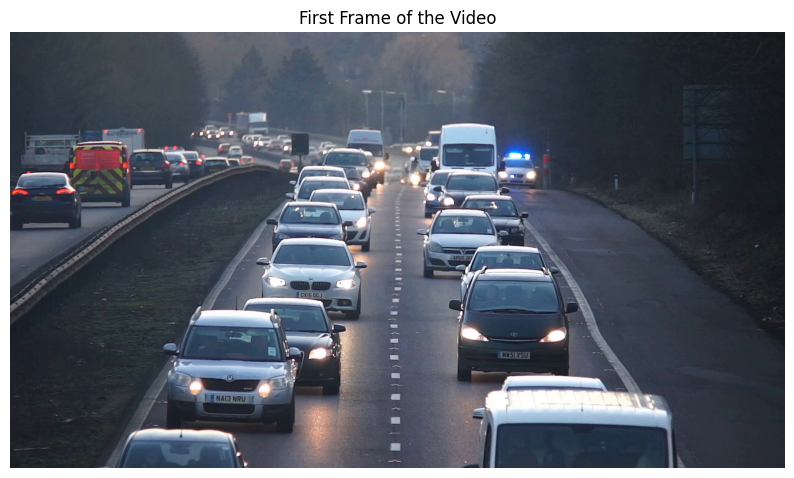

In [ ]:
# Open the video file
cap = cv2.VideoCapture('traffic_video.mp4')

# Check if the video file opened successfully
if not cap.isOpened():
    print("Error: Could not open video file")
else:
    # Read the first frame
    ret, frame = cap.read()

    if ret:
        # Get video details
        fps = cap.get(cv2.CAP_PROP_FPS)
        frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        print(f"Video details:")
        print(f"Resolution: {frame_width}x{frame_height}")
        print(f"FPS: {fps}")
        print(f"Total frames: {total_frames}")
        print(f"Duration: {total_frames/fps:.2f} seconds")

        # Save the first frame as an image
        cv2.imwrite('first_frame.jpg', frame)
        print("\nFirst frame saved as 'first_frame.jpg'")

        # Display the frame
        plt.figure(figsize=(10, 6))
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title("First Frame of the Video")
        plt.axis('off')
        plt.show()
    else:
        print("Error: Could not read the first frame")

    # Release the video capture object
    cap.release()

Now let's use YOLOv8 to detect vehicles in the first frame


0: 384x640 21 cars, 1 bus, 2 trucks, 232.4ms
Speed: 10.0ms preprocess, 232.4ms inference, 20.5ms postprocess per image at shape (1, 3, 384, 640)


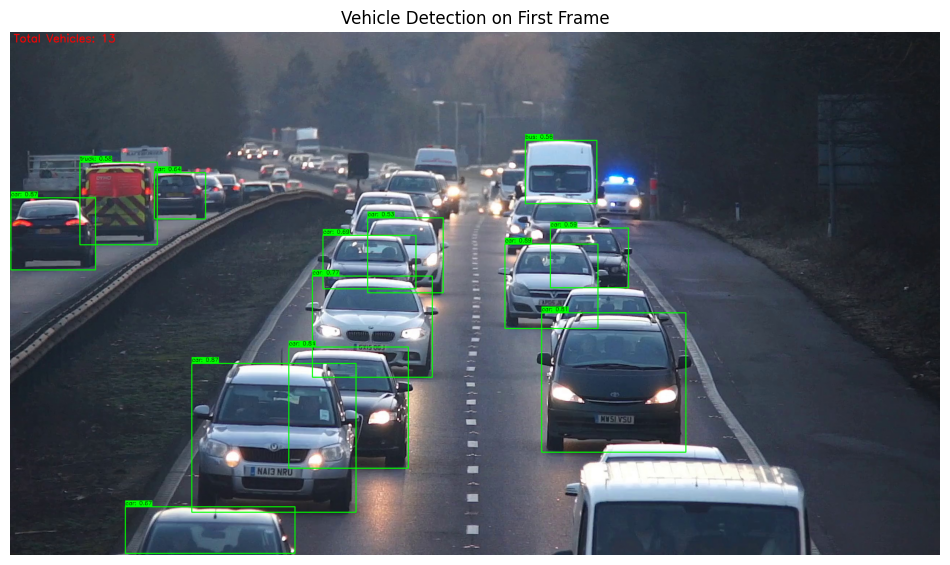

Detected 13 vehicles

Annotated frame saved as 'annotated_first_frame.jpg'


In [ ]:
# Load the saved first frame
frame = cv2.imread('first_frame.jpg')

# Define the classes we're interested in (car, bus, truck)
vehicle_classes = [2, 5, 7]  # COCO dataset class IDs for car, bus, truck

# Run YOLOv8 inference on the frame
results = model(frame)

# Get detection results from the first detection (there's only one image)
result = results[0]

# Initialize a list to store vehicle detections
vehicle_detections = []

# Filter for vehicle classes and confidence threshold
for box in result.boxes:
    class_id = int(box.cls.item())
    confidence = box.conf.item()

    # Only include vehicles with confidence > 0.5
    if class_id in vehicle_classes and confidence > 0.5:
        # Get bounding box coordinates (convert from PyTorch tensor to integers)
        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())

        # Add to our vehicle detections list
        class_name = model.names[class_id]
        vehicle_detections.append((x1, y1, x2, y2, confidence, class_name))

# Create a copy of the frame to draw on
annotated_frame = frame.copy()

# Draw bounding boxes for vehicle detections
for x1, y1, x2, y2, conf, class_name in vehicle_detections:
    # Draw rectangle
    cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Prepare label text
    label = f"{class_name}: {conf:.2f}"

    # Determine text size and position
    (text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    y1 = max(y1, text_height + 5)

    # Draw filled rectangle for text background
    cv2.rectangle(annotated_frame, (x1, y1 - text_height - 5), (x1 + text_width, y1), (0, 255, 0), -1)

    # Add text
    cv2.putText(annotated_frame, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

# Add a total count to the image
total_count = len(vehicle_detections)
count_text = f"Total Vehicles: {total_count}"
cv2.putText(annotated_frame, count_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Display the annotated frame
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
plt.title("Vehicle Detection on First Frame")
plt.axis('off')
plt.show()

# Save the annotated frame
cv2.imwrite('annotated_first_frame.jpg', annotated_frame)
print(f"Detected {total_count} vehicles")
print("\nAnnotated frame saved as 'annotated_first_frame.jpg'")

## 5 & 6. Process the Entire Video and Show Results

Now, let's process the entire video, detect vehicles in each frame, and create a new video with annotations.

In [ ]:
# Define a function to process the video
def process_video(input_path, output_path, model, target_classes, conf_threshold=0.5):
    # Open the video file
    cap = cv2.VideoCapture(input_path)

    # Check if the video opened successfully
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Create video writer for output
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    # Initialize a counter for processed frames
    frame_count = 0

    # Process frames
    while cap.isOpened():
        # Read a frame
        success, frame = cap.read()

        if not success:
            break

        # Update frame count
        frame_count += 1

        # Print progress every 10 frames
        if frame_count % 10 == 0:
            print(f"Processing frame {frame_count}/{total_frames} ({frame_count/total_frames*100:.1f}%)")

        # Run YOLOv8 inference
        results = model(frame)
        result = results[0]

        # Filter for vehicle classes
        detections = []
        for box in result.boxes:
            class_id = int(box.cls.item())
            confidence = box.conf.item()

            if class_id in target_classes and confidence > conf_threshold:
                x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
                class_name = model.names[class_id]
                detections.append((x1, y1, x2, y2, confidence, class_name))

        # Create a copy of the frame
        annotated_frame = frame.copy()

        # Draw bounding boxes
        for x1, y1, x2, y2, conf, class_name in detections:
            cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Prepare label text
            label = f"{class_name}: {conf:.2f}"

            # Determine text size and position
            (text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
            y1 = max(y1, text_height + 5)

            # Draw filled rectangle for text background
            cv2.rectangle(annotated_frame, (x1, y1 - text_height - 5), (x1 + text_width, y1), (0, 255, 0), -1)

            # Add text
            cv2.putText(annotated_frame, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

        # Add a total count to the frame
        total_count = len(detections)
        count_text = f"Total Vehicles: {total_count}"
        cv2.putText(annotated_frame, count_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # Add frame number
        frame_text = f"Frame: {frame_count}/{total_frames}"
        cv2.putText(annotated_frame, frame_text, (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        # Write the frame to the output video
        out.write(annotated_frame)

    # Release video capture and writer
    cap.release()
    out.release()

    print(f"\nProcessing complete! Output saved to {output_path}")
    return output_path

In [ ]:
# Define the target classes (vehicles)
vehicle_classes = [2, 5, 7]  # car, bus, truck

# Process the video (this will be much faster with the 10-second clip)
output_path = process_video(
    input_path='traffic_video.mp4',
    output_path='annotated_traffic_video.mp4',
    model=model,
    target_classes=vehicle_classes,
    conf_threshold=0.5
)


0: 384x640 21 cars, 1 bus, 2 trucks, 121.5ms
Speed: 4.0ms preprocess, 121.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 cars, 1 bus, 2 trucks, 134.5ms
Speed: 4.7ms preprocess, 134.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 cars, 1 bus, 2 trucks, 137.4ms
Speed: 3.9ms preprocess, 137.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 cars, 1 bus, 2 trucks, 126.6ms
Speed: 4.2ms preprocess, 126.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 cars, 1 bus, 2 trucks, 121.5ms
Speed: 4.1ms preprocess, 121.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 cars, 1 bus, 3 trucks, 122.5ms
Speed: 4.1ms preprocess, 122.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 cars, 1 bus, 3 trucks, 129.5ms
Speed: 4.2ms preprocess, 129.5ms inference, 1.3ms postprocess per image at shape (1, 3, 38

## Display the Annotated Video

Let's display the processed video with vehicle detections.

In [ ]:
# Function to display the video in the notebook
def display_video(video_path):
    # Read the video file
    video_file = open(video_path, "rb")
    video_bytes = video_file.read()
    video_file.close()

    # Convert to base64
    encoded = b64encode(video_bytes).decode()

    # Display the video using HTML
    display(HTML(f"""
    <video width="800" height="600" controls>
        <source src="data:video/mp4;base64,{encoded}" type="video/mp4">
        Your browser does not support the video tag.
    </video>
    """))

# Display the annotated video
print("Displaying the video with vehicle detections:")
display_video('annotated_traffic_video.mp4')

Displaying the video with vehicle detections:
Buffered data was truncated after reaching the output size limit.

## Bonus Challenge: Implement a Vehicle Counter

As a challenge for workshop participants, try to modify the code to:

1. Count vehicles only when they cross a specific line in the video
2. Track the same vehicle across multiple frames
3. Classify vehicle types and count them separately
4. Estimate vehicle speeds based on their movement between frames

This will require additional research into OpenCV tracking methods or other tracking libraries.

## Conclusion

In this workshop, we've learned how to:
1. Download a sample video and trim it to 10 seconds for faster processing
2. Install YOLOv8 and necessary libraries
3. Load a pre-trained model
4. Detect vehicles in a single frame
5. Process the entire video
6. Display the results with vehicle labels and counts

You can now adapt this code for your own projects, using different videos or detecting different objects!

## Resources and Further Reading

- [Ultralytics YOLOv8 Documentation](https://docs.ultralytics.com/)
- [OpenCV Documentation](https://docs.opencv.org/)
- [COCO Dataset Classes](https://tech.amikelive.com/node-718/what-object-categories-labels-are-in-coco-dataset/)
- [Object Tracking Tutorials](https://learnopencv.com/object-tracking-using-opencv-cpp-python/)